
Descriptive Statistics: 
           ProductID       Price    Rating   NumReviews  StockQuantity  \
mean      500.500000  253.775510  3.025600  2498.753000     495.395000   
std       288.819436  141.403620  1.151004  1463.241871     292.799253   
median    500.500000  251.310000  3.100000  2476.000000     505.000000   
skewness    0.000000    0.031605 -0.078781     0.000140      -0.022212   
kurtosis   -1.200000   -1.163139 -1.152106    -1.243162      -1.228884   

          Discount        Sales  
mean      0.251640  1011.037000  
std       0.146455   582.113466  
median    0.250000   998.000000  
skewness  0.000592    -0.017176  
kurtosis -1.201066    -1.209282  

Correlation Matrix: 
               ProductID     Price    Rating  NumReviews  StockQuantity  \
ProductID       1.000000 -0.040180 -0.000289    0.043875      -0.015074   
Price          -0.040180  1.000000 -0.006462    0.012782      -0.006409   
Rating         -0.000289 -0.006462  1.000000   -0.009832       0.000576   
Num

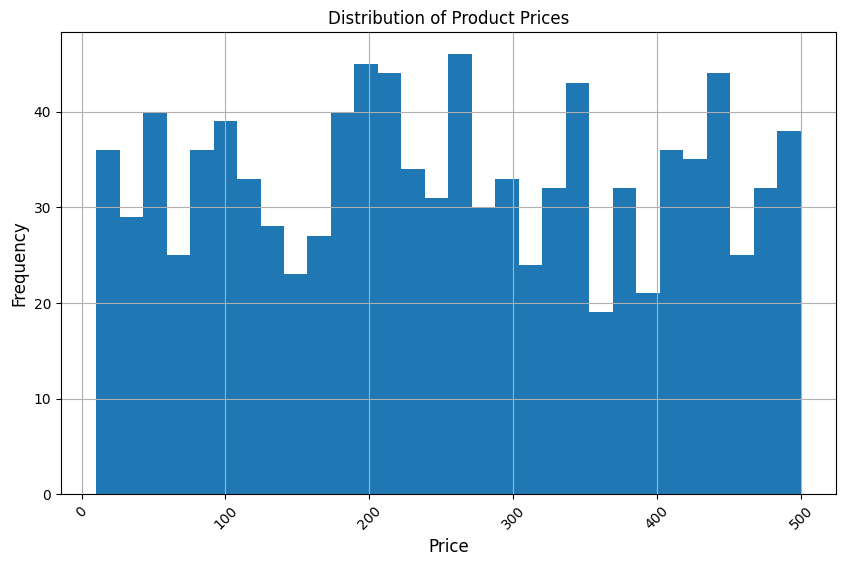

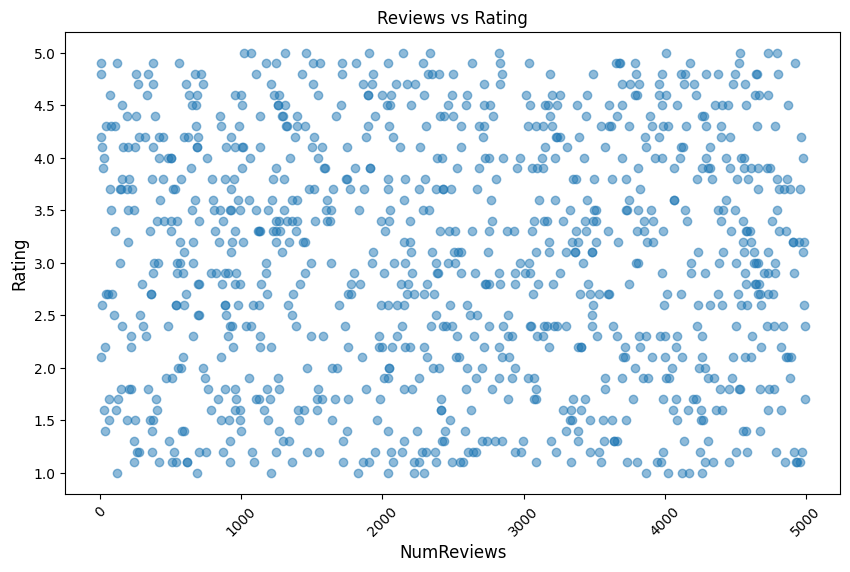

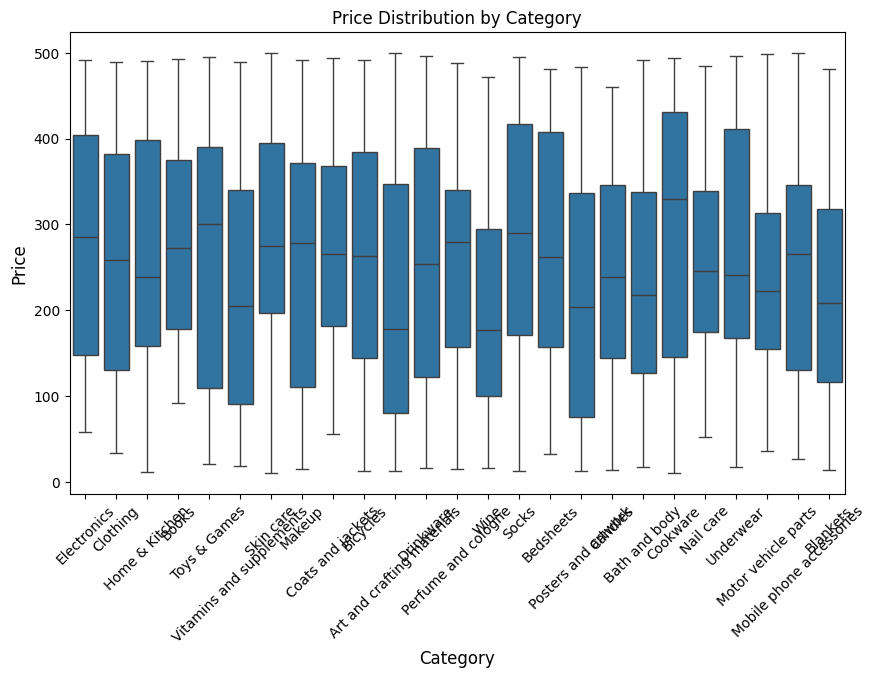

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset
file_path_new = 'ecommerce_product_dataset.csv'
df = pd.read_csv(file_path_new)

# Select important columns for analysis
columns_of_interest = [
    'ProductID', 'Price', 'Rating', 
    'NumReviews', 'StockQuantity', 'Discount', 'Sales'
]
df_subset = df[columns_of_interest]

# Calculate and display the desired statistics for the selected columns
def display_statistics(data):
    """
    Calculates and displays mean, median, skewness, kurtosis, and standard deviation for the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    """
    statistics = data.describe().loc[['mean', 'std']]
    statistics.loc['median'] = data.median()
    statistics.loc['skewness'] = data.skew()
    statistics.loc['kurtosis'] = data.kurtosis()
    return statistics

# Function to create a histogram
def plot_histogram(data, column, title):
    """
    Plots a histogram for a specified column in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    column (str): The column name for which to plot the histogram.
    title (str): The title of the histogram.
    """
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=30)
    plt.title(title)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Function to create a scatter plot
def plot_scatter(data, x_column, y_column, title):
    """
    Plots a scatter plot for specified x and y columns in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    title (str): The title of the scatter plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

def plot_boxplot(data, x_column, y_column, title):
    """
    Plots a box plot for a specified x and y column in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    title (str): The title of the box plot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Display the desired statistics
statistics = display_statistics(df_subset)
print("\nDescriptive Statistics: ")
print(statistics)

# Compute the correlation matrix
def compute_correlation(data):
    """
    Computes and returns the correlation matrix of the dataframe.
    Only numeric columns are considered.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    
    Returns:
    pd.DataFrame: The correlation matrix.
    """
    numeric_data = data.select_dtypes(include=[float, int])
    return numeric_data.corr()

correlation_matrix = compute_correlation(df_subset)
print("\nCorrelation Matrix: ")
print(correlation_matrix)

# Histogram for Price
plot_histogram(df_subset, 'Price', 'Distribution of Product Prices')

# Scatter plot for Reviews vs Rating
plot_scatter(df_subset, 'NumReviews', 'Rating', 'Reviews vs Rating')

# Box plot for Price vs Category
plot_boxplot(df, 'Category', 'Price', 'Price Distribution by Category')
